# PROJETO 2
INTRODUÇÂO AO PROCESSAMENTO DE IMAGENS


Prof. Bruno Luiggi Macchiavello Espinoza


Lucas Corrêa Boaventura - 211038262

## Bibliotecas

In [3739]:
import numpy as np
from PIL import Image
from IPython.display import display
import cv2
import matplotlib.pyplot as plt

## Questão 1

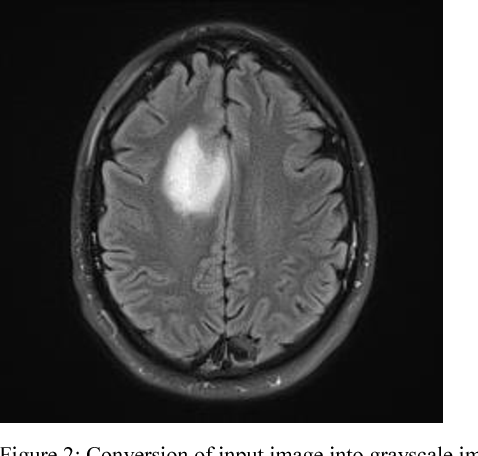

In [3740]:
brain=Image.open('./brain.png')
brain

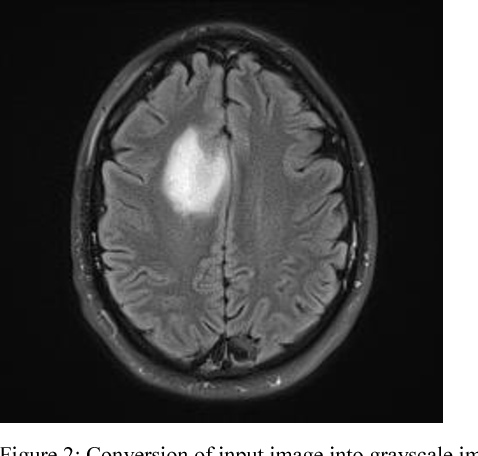

In [3741]:
gray_brain = cv2.cvtColor(np.array(brain), cv2.COLOR_RGB2GRAY)
Image.fromarray(gray_brain)

### Filtro passa baixas
Foi usado o Gaussiano

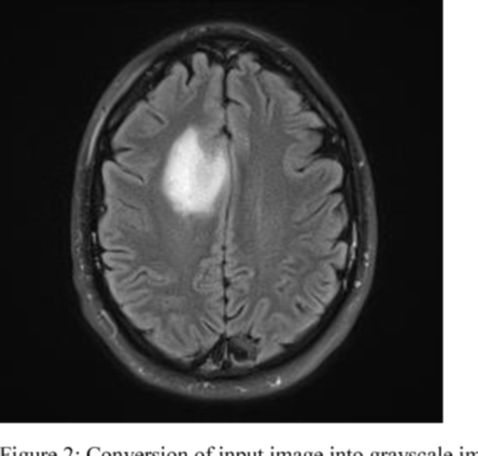

In [3742]:
img_low_filter = cv2.GaussianBlur(gray_brain, (3, 3), 0)
Image.fromarray(img_low_filter)

### Filtro de mediana

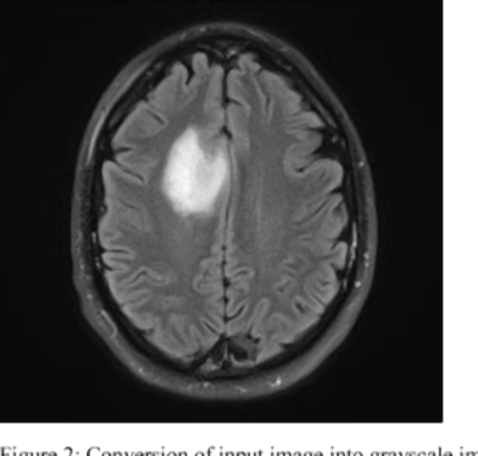

In [3743]:
img = cv2.medianBlur(img_low_filter, 3)
Image.fromarray(img)

### Histograma

In [3744]:
histograma1 = cv2.calcHist([gray_brain], [0], None, [256], [0, 256])
histograma2 = cv2.calcHist([img_low_filter], [0], None, [256], [0, 256])
histograma3 = cv2.calcHist([img], [0], None, [256], [0, 256])

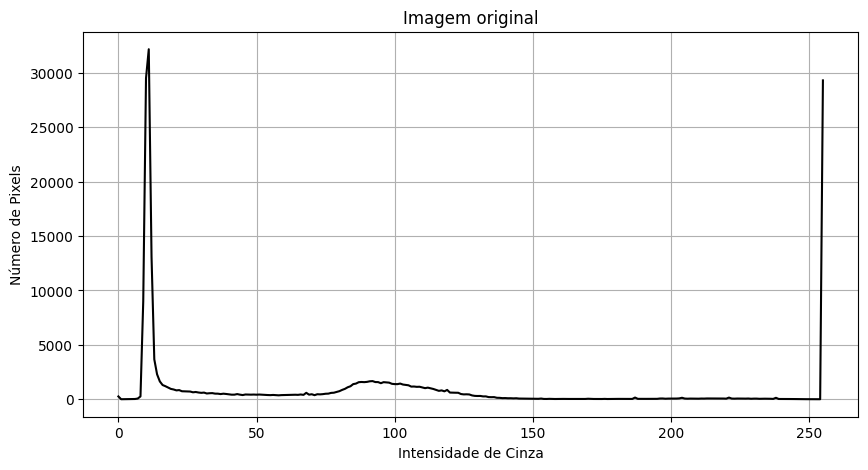

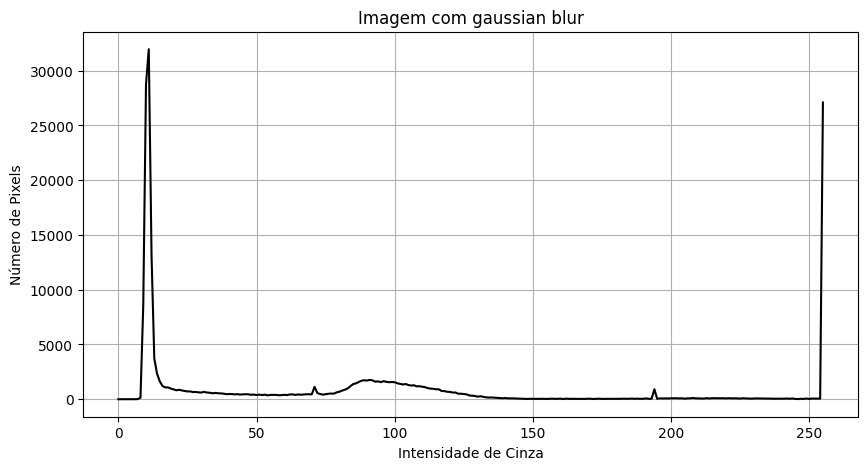

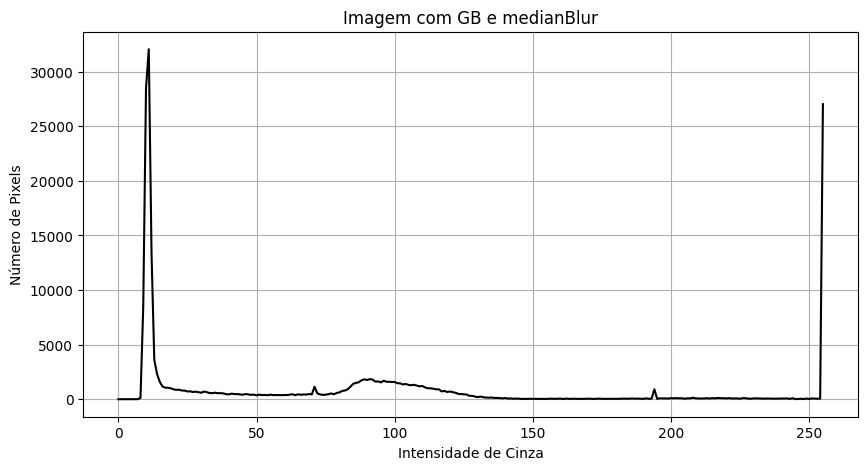

In [3745]:
plt.figure(figsize=(10, 5))
plt.plot(histograma1, color='black')
plt.title('Imagem original')
plt.xlabel('Intensidade de Cinza')
plt.ylabel('Número de Pixels')
plt.grid()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(histograma2, color='black')
plt.title('Imagem com gaussian blur')
plt.xlabel('Intensidade de Cinza')
plt.ylabel('Número de Pixels')
plt.grid()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(histograma3, color='black')
plt.title('Imagem com GB e medianBlur')
plt.xlabel('Intensidade de Cinza')
plt.ylabel('Número de Pixels')
plt.grid()
plt.show()

#### Escolha de limiar pelo histograma

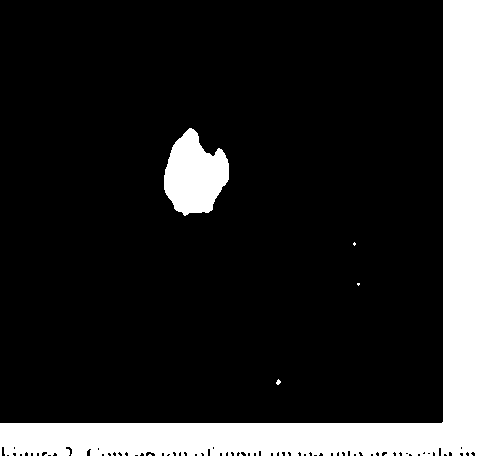

In [3746]:
limiar = 150 # valor entre os dois picos mais claros
_, img_bin = cv2.threshold(img, limiar, 255, cv2.THRESH_BINARY)
Image.fromarray(img_bin)

### Abertura e fechamento

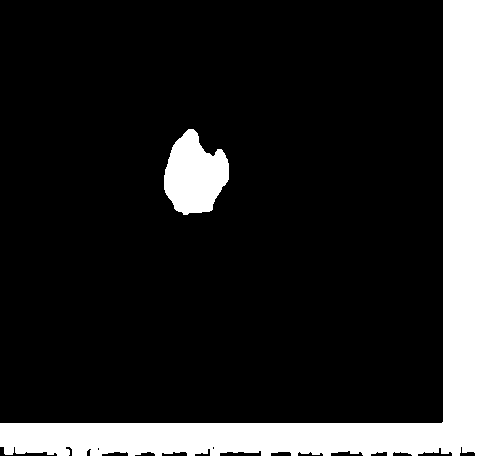

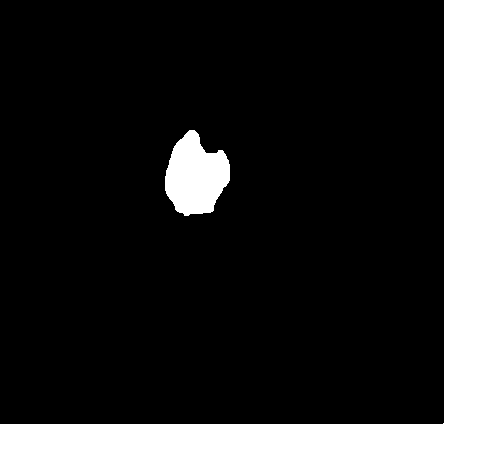

In [3747]:
def elem_stru(shape) : return np.ones(shape, np.uint8)
img_open = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, elem_stru((5,5)))
display(Image.fromarray(img_open))
img_open_closed = cv2.morphologyEx(img_open, cv2.MORPH_CLOSE, elem_stru((20,10)))
Image.fromarray(img_open_closed)

### Elementos conexos

In [3748]:
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(img_open_closed, connectivity=8)
num_labels, labels, stats, centroids

(3,
 array([[0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]], dtype=int32),
 array([[     0,      0,    444,    424, 184406],
        [     0,      0,    478,    456,  29713],
        [   165,    130,     65,     86,   3849]], dtype=int32),
 array([[222.04769368, 212.24457989],
        [346.21569683, 328.87958133],
        [195.20239023, 175.77214861]]))

[69, 186, 127]


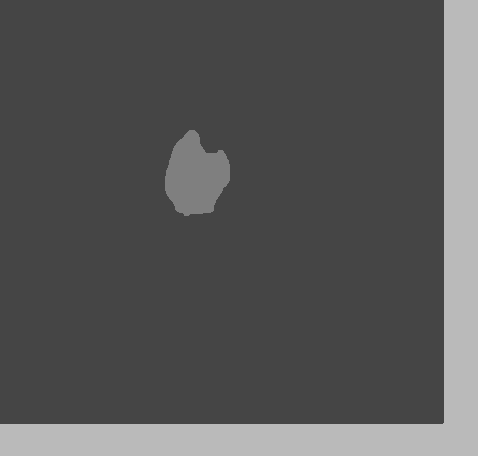

In [3749]:
conection = np.zeros((img_open_closed.shape[0], img_open_closed.shape[1]), dtype=np.uint8)
random_color = np.random.randint(0, 255)
colors = [random_color, 255-random_color, 127 ]
print(colors)
for i in range(num_labels):
    conection[labels == i] = colors[i]
Image.fromarray(conection)

#### Identificação do tumor

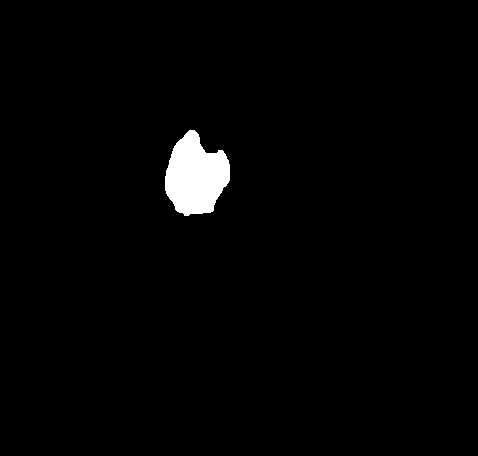

In [3750]:
# Como não queremos nem um dos dois tipos de fundo, buscamento o elemento de menor area
smallest_area_label = np.argmin(stats[:,4])
tumor = np.zeros((img_open_closed.shape[0], img_open_closed.shape[1]), dtype=np.uint8)
tumor[labels == smallest_area_label] = 255
Image.fromarray(tumor)

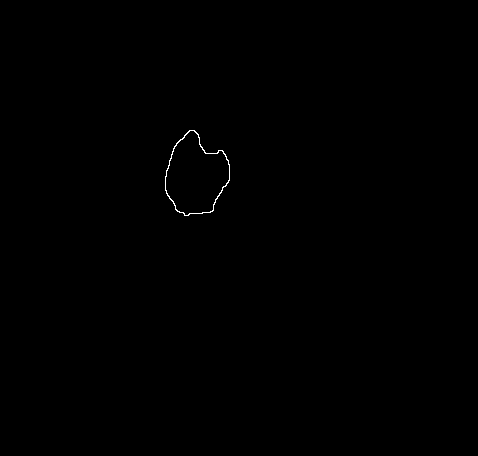

In [3751]:
kernel = np.ones((3, 3), np.uint8)
erosion = cv2.erode(tumor, kernel)
contour = tumor-erosion
Image.fromarray(contour)

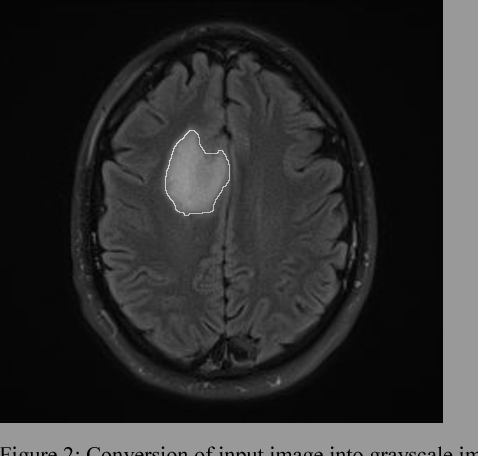

In [3752]:
alpha=0.6
tumor_highlighted = cv2.addWeighted(np.array(gray_brain), alpha, contour,(1-alpha), 0)
Image.fromarray(tumor_highlighted)


## Questão 2

### 1. Ler imagem

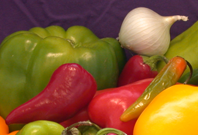

In [3753]:
onion = Image.open('onion.png')
onion

### 2. Aplicanto k-means

In [3754]:
def use_kmeans(image, clusters, iter=36, precision=4):
    img = np.float32(np.array(image).reshape((-1, 3)))
    print(img.shape)
    criterios = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, iter, precision)

    _, labels, centers = cv2.kmeans(img, clusters, None, criterios, 10, cv2.KMEANS_RANDOM_CENTERS)
    centers = np.uint8(centers)

    display(Image.fromarray(centers[labels.flatten()].reshape(np.array(onion).shape)))
    return labels, centers


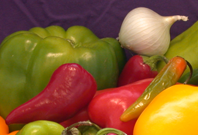

(26730, 3)


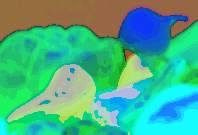

[[178 209 194]
 [177 212 141]
 [177 193 155]
 [177 178 167]]


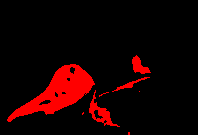

In [3755]:

blurred = cv2.GaussianBlur(np.array(onion), (7, 7), 0)
hsv_image = cv2.cvtColor(blurred, cv2.COLOR_RGB2HSV)
hsv_image=Image.fromarray(hsv_image)
display(onion)


labels, centers= use_kmeans(hsv_image, 100)

# segmentacao dos clusters por cor vermelha
red_centers = [i for i in range(len(centers)) if centers[i][1]>100 and centers[i][1]<222 and centers[i][2]>100 and centers[i][2]<222 and centers[i][0]>50]
output_image = np.zeros_like(onion).reshape((-1, 3))
print(centers[red_centers])
for red_i in red_centers:
    output_image[labels.flatten()==red_i] = 255,0,0
    img_seg = output_image.reshape(np.array(onion).shape)

    # print(img_seg)
    display(Image.fromarray(img_seg))

In [3756]:
test=img_seg

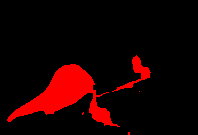

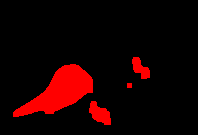

In [3757]:
def elem_stru(shape) : return np.ones(shape, np.uint8)
img_seg=test
# img_open = cv2.morphologyEx(img_seg, cv2.MORPH_OPEN, elem_stru((3,3)))
# display(Image.fromarray(img_open))
img_seg = cv2.morphologyEx(img_seg, cv2.MORPH_CLOSE, elem_stru((5,5)))
display(Image.fromarray(img_seg))
img_seg = cv2.morphologyEx(img_seg, cv2.MORPH_OPEN, elem_stru((5,5)))
display(Image.fromarray(img_seg))

[[ 132   57   18   22  229]
 [  13   64   80   53 2000]
 [ 127   83    5    5   25]
 [  89  101   22   24  322]]


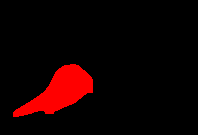

In [3758]:
_, img_bin = cv2.threshold(cv2.cvtColor(img_seg, cv2.COLOR_RGB2GRAY), 0, 255, cv2.THRESH_BINARY)
Image.fromarray(img_bin)
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(img_bin, connectivity=8)
stats=stats[1:]# retirar fundo
biggest_area_label = np.argmax(stats[:,4])+1 # somar 1 pro index esta correto
print(stats)
pimenta = np.zeros(img_seg.shape, dtype=np.uint8)
pimenta[labels == biggest_area_label] = 255,0,0
Image.fromarray(pimenta)

### 3. Resultado da segmentação

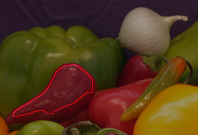

In [3759]:
def get_vegetable(img):
    kernel = np.ones((3, 3), np.uint8)
    erosion = cv2.erode(img, kernel)
    contour = img-erosion
    alpha=0.6
    return cv2.addWeighted(np.array(onion), alpha, contour,(1-alpha), 0)
pimentas = get_vegetable(pimenta)
Image.fromarray(pimentas)

### 4. Pegar cebola

(26730, 3)


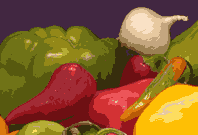

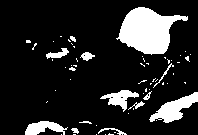

In [3760]:
# img_low_filter = cv2.GaussianBlur(np.array(onion), (9, 9), 0)
# onion_blur=Image.fromarray(img_low_filter)

labels, centers = use_kmeans(onion, 20)

# segmentacao dos clusters por cor branca
white_center = [i for i in range(len(centers)) if centers[i][0]>50 and centers[i][1]>50 and centers[i][2]>50]
output_image = np.zeros_like(onion).reshape((-1, 3))
for white_i in white_center:
    output_image[labels.flatten()==white_i] = 255
    
img_seg = output_image.reshape(np.array(onion).shape)

display(Image.fromarray(img_seg))

In [3761]:
img_seg = cv2.cvtColor(img_seg, cv2.COLOR_RGB2GRAY)

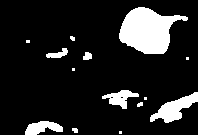

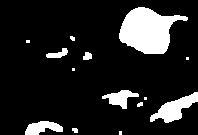

In [3762]:
def elem_stru(shape) : return np.ones(shape, np.uint8)

img_open = cv2.morphologyEx(img_seg, cv2.MORPH_OPEN, elem_stru((3,3)))
display(Image.fromarray(img_open))
img_open_closed = cv2.morphologyEx(img_open, cv2.MORPH_CLOSE, elem_stru((3,3)))
Image.fromarray(img_open_closed)

In [3763]:
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(img_open_closed, connectivity=4)

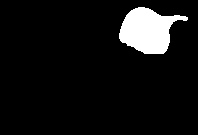

In [3764]:
# Queremos o maior elemento depois do fundo
stats=stats[1:] #tirar o fundo
biggest_area_label = np.argmax(stats[:,4])+1#somar 1 pq tiramos um elemento
img_seg = np.zeros((img_open_closed.shape[0], img_open_closed.shape[1]), dtype=np.uint8)
img_seg[labels == biggest_area_label] = 255
img_seg = cv2.cvtColor(img_seg, cv2.COLOR_GRAY2RGB)
Image.fromarray(img_seg)

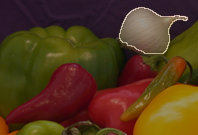

In [3765]:
cebola = get_vegetable(img_seg)
Image.fromarray(cebola)

### Pegar todos os vegetais

In [3766]:
img_low_filter = cv2.GaussianBlur(np.array(onion), (15, 15), 0)
onion_blur=Image.fromarray(img_low_filter)

(26730, 3)


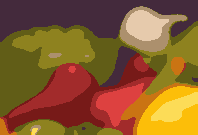

In [3767]:
labels, centers = use_kmeans(onion_blur, 11)

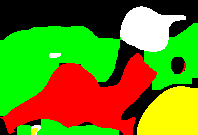

In [3768]:
output_image = np.zeros_like(onion).reshape((-1, 3))
# segmentacao dos clusters por cor

gree_center = [i for i in range(len(centers)) if
                    abs(centers[i][0]-centers[i][1])<50 and\
                    centers[i][0]>50 and\
                    centers[i][1]>50 and\
                    centers[i][2]<80
                ]
for green_i in gree_center:
    output_image[labels.flatten()==green_i] = [0, 255, 0]

img_seg = output_image.reshape(np.array(onion).shape)
img_seg = cv2.morphologyEx(img_seg, cv2.MORPH_OPEN, elem_stru((9,9)))
# display(Image.fromarray(img_seg))
img_seg = cv2.morphologyEx(img_seg, cv2.MORPH_CLOSE, elem_stru((7,7)))
# display(Image.fromarray(img_seg))
output_image = img_seg.reshape((-1,3))


white_center = [i for i in range(len(centers)) if
                    centers[i][0]>50 and\
                    centers[i][1]>50 and\
                    centers[i][2]>50
                ]
for white_i in white_center:
    output_image[labels.flatten()==white_i] = 255


img_seg = output_image.reshape(np.array(onion).shape)
img_seg = cv2.morphologyEx(img_seg, cv2.MORPH_OPEN, elem_stru((3,3)))
# display(Image.fromarray(img_seg))
img_seg = cv2.morphologyEx(img_seg, cv2.MORPH_CLOSE, elem_stru((3,3)))
# display(Image.fromarray(img_seg))
output_image = img_seg.reshape((-1,3))

red_centers = [i for i in range(len(centers)) if
                    centers[i][0]>100 and\
                    centers[i][1]<80 and\
                    centers[i][2]<80
                ]
for red_i in red_centers:
    output_image[labels.flatten()==red_i] = [255, 0, 0]

yellow_center = [i for i in range(len(centers)) if
                    abs(centers[i][0]-centers[i][1])<80 and\
                    centers[i][0]>150 and\
                    centers[i][1]>150 and\
                    centers[i][2]<100
                ]
for yellow_i in yellow_center:
    output_image[labels.flatten()==yellow_i] = [255, 255, 0]

img_seg = output_image.reshape(np.array(onion).shape)
display(Image.fromarray(img_seg))
# img_seg = cv2.cvtColor(img_seg, cv2.COLOR_RGB2GRAY)

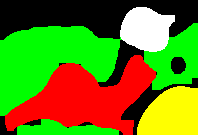

In [3769]:
img_open = cv2.morphologyEx(img_seg, cv2.MORPH_OPEN, elem_stru((7,7)))
display(Image.fromarray(img_open))

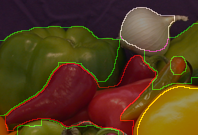

In [3770]:
vegetais = get_vegetable(img_open)
Image.fromarray(vegetais)